In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import scipy
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import graphviz

sns.set()

       Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               1   0.23    5      6        2   61.5   55.0    330  3.95   
1               2   0.21    4      6        3   59.8   61.0    327  3.89   
2               3   0.23    2      6        5   56.9   65.0    328  4.05   
3               4   0.29    4      2        4   62.4   58.0    337  4.20   
4               5   0.31    2      1        2   63.3   58.0    338  4.34   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
53935       53936   0.72    5      7        3   60.8   57.0   2758  5.75   
53936       53937   0.72    2      7        3   63.1   55.0   2759  5.69   
53937       53938   0.70    3      7        3   62.8   60.0   2760  5.66   
53938       53939   0.86    4      3        2   61.0   58.0   2757  6.15   
53939       53940   0.75    5      7        2   62.2   55.0   2761  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      

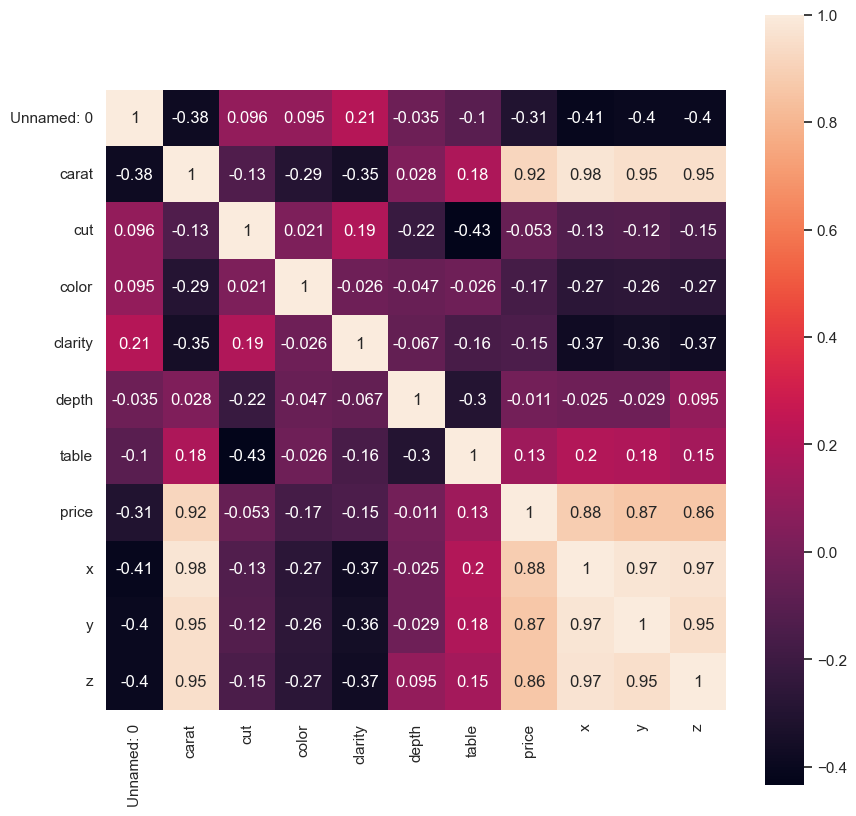

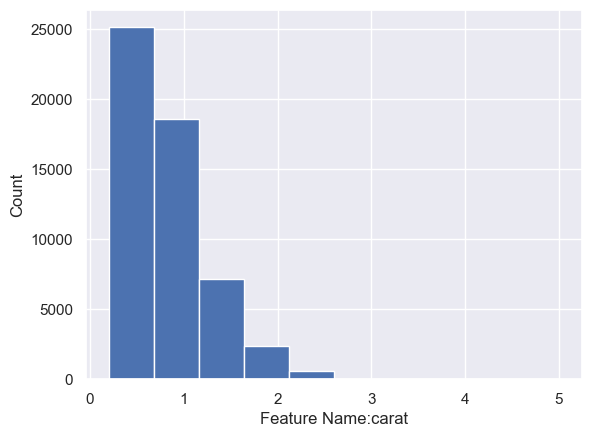

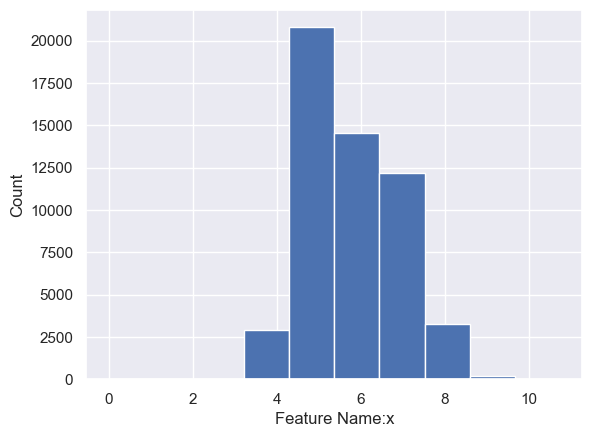

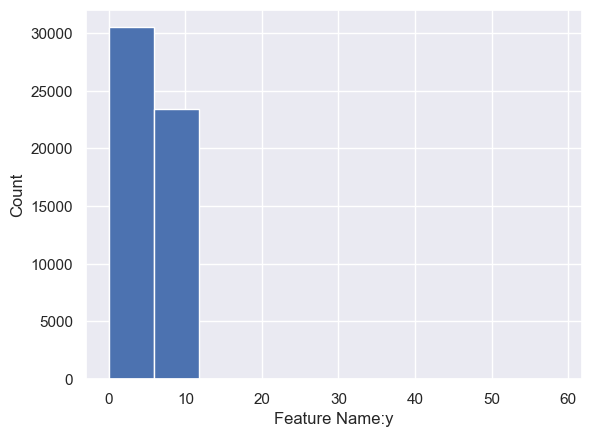

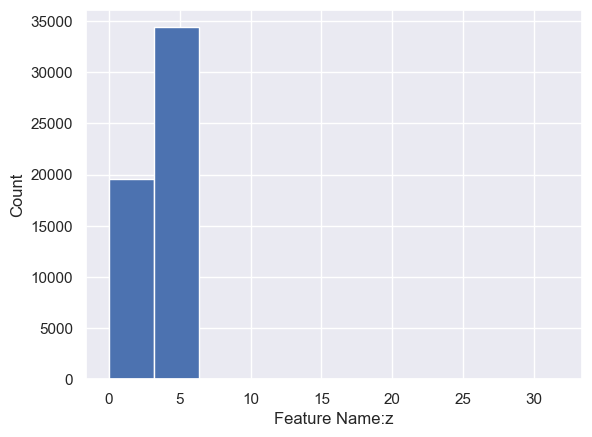

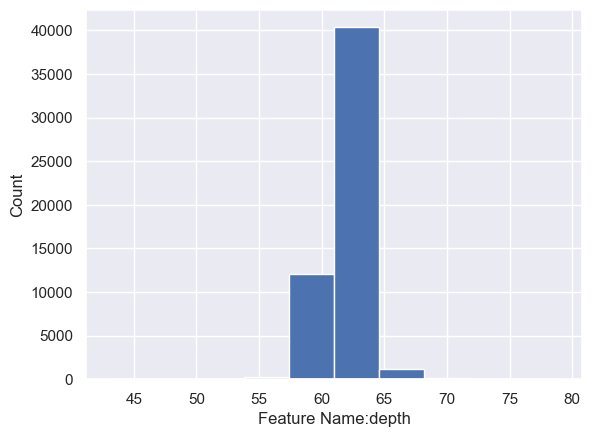

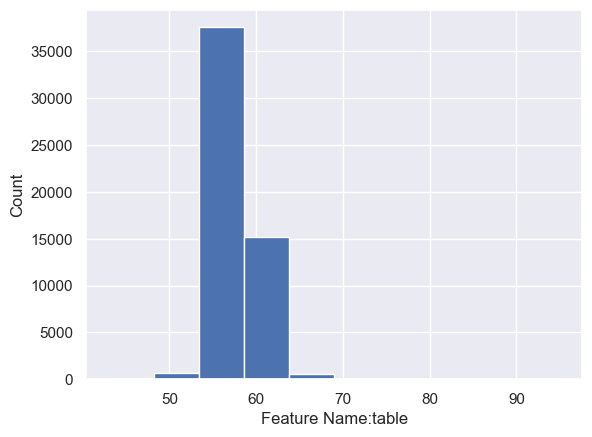

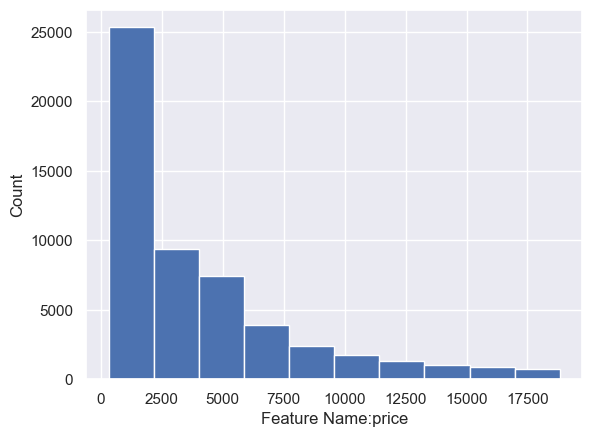

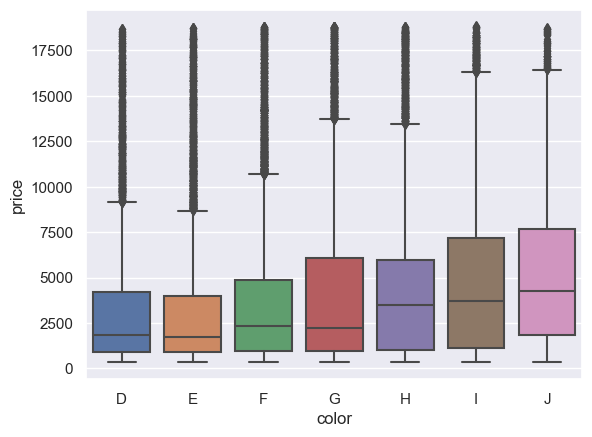

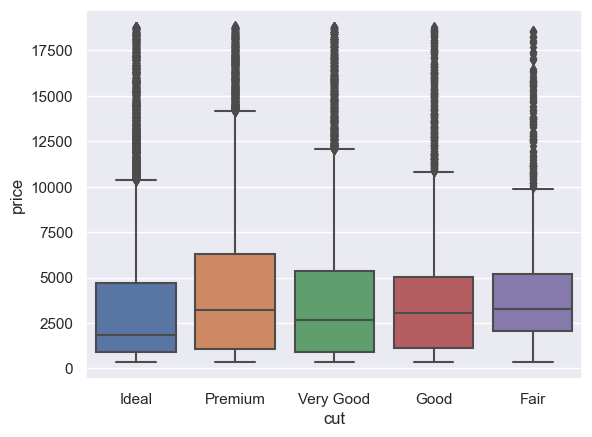

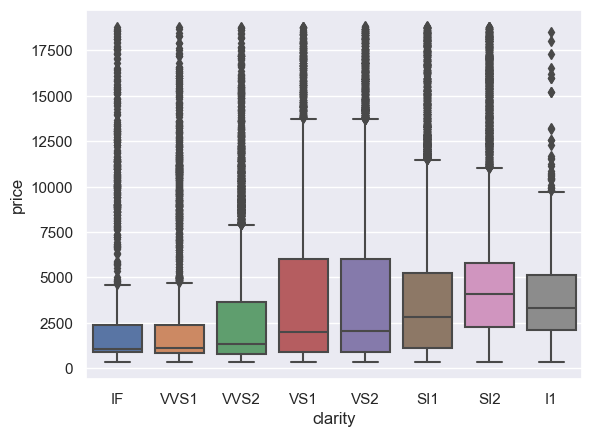

0

In [80]:
#################### Question 1 ########################
file_name = "diamonds.csv"
dataset = pd.read_csv(file_name)
# numerical encoding of categorical features
dataset_original = dataset.copy()
dataset_original['cut'].replace({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}, inplace=True)
dataset_original['clarity'].replace({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}, inplace=True)
dataset_original['color'].replace({'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}, inplace=True)
print(dataset_original)

plt.figure(figsize=(10, 10))
sns.heatmap(data=dataset_original.corr(method='pearson', min_periods=1), annot=True, square=True)
plt.savefig('Q1_Pearson_heatmap.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


def plot_numerical_features_histogram(dataset, features):
    for feat in features:
        plt.hist(dataset[feat])
        plt.ylabel('Count')
        plt.xlabel('Feature Name:'+str(feat))
        plt.savefig('Q1_'+feat+'_histogram.png', dpi=300)
        plt.show()
    return 0


plot_numerical_features_histogram(dataset_original, ['carat', 'x', 'y', 'z', 'depth', 'table', 'price'])


def plot_boxplot(dataset, feature):
    if feature == 'color':
        # boxplot of color
        sns.boxplot(x=dataset['color'], y=dataset['price'], order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
        plt.savefig('Q1_color_boxplot.png', dpi=300)
        plt.show()
    elif feature == 'cut':
        # boxplot of cut
        sns.boxplot(x=dataset['cut'], y=dataset['price'], order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
        plt.savefig('Q1_cut_boxplot.png', dpi=300)
        plt.show()
    elif feature == 'clarity':
        # boxplot of clarity
        sns.boxplot(x=dataset['clarity'], y=dataset['price'], order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
        plt.savefig('Q1_clarity_boxplot.png', dpi=300)
        plt.show()
    else:
        print('Error!')
    return 0


plot_boxplot(dataset, 'color')
plot_boxplot(dataset, 'cut')
plot_boxplot(dataset, 'clarity')

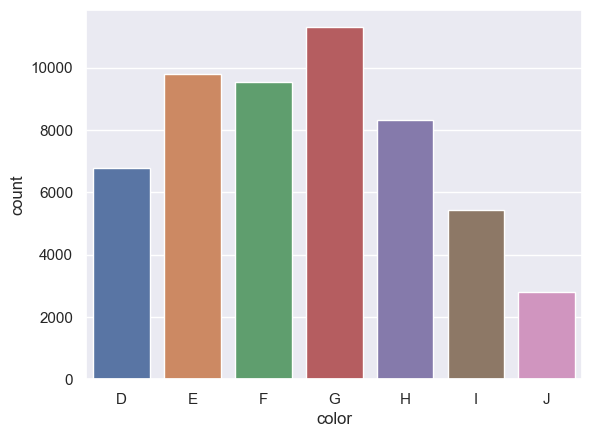

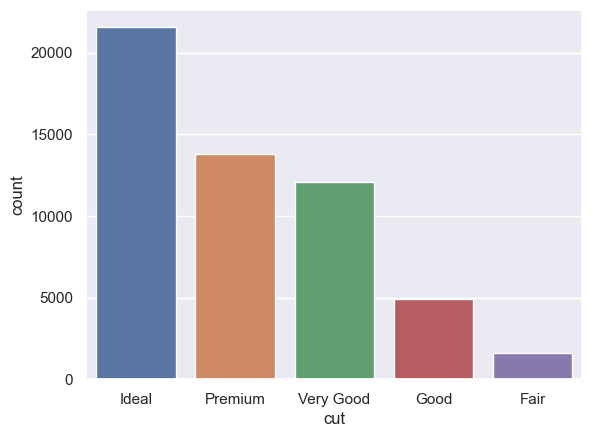

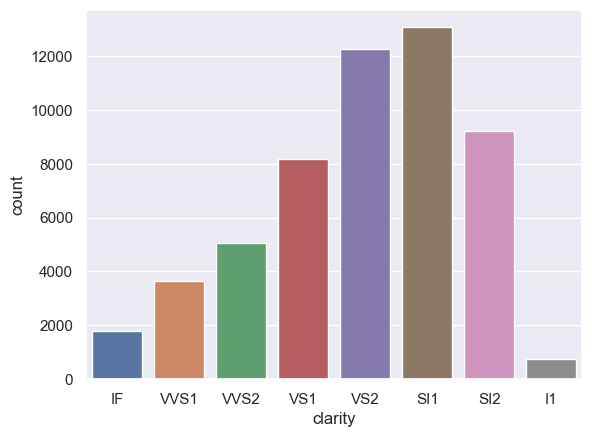

0

In [81]:
def plot_categorical_features_histogram(dataset, features):
    for feat in features:
        if feat == 'color':
            sns.countplot(data=dataset, x=feat, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
            plt.savefig('Q1_color_count.png', dpi=300)
            plt.show()
        elif feat == 'cut':
            sns.countplot(data=dataset, x=feat, order=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'])
            plt.savefig('Q1_cut_count.png', dpi=300)
            plt.show()
        elif feat == 'clarity':
            sns.countplot(data=dataset, x=feat, order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
            plt.savefig('Q1_clarity_count.png', dpi=300)
            plt.show()
        else:
            print('Error!')
    return 0

plot_categorical_features_histogram(dataset, features=['color', 'cut', 'clarity'])

#################### Question 1 End ########################

In [82]:
scaler = StandardScaler()
dataset_original_mat = dataset_original.values
print(dataset_original_mat.shape)  # (53940,11), the first columns are indices
print('original dataset:', np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])))
print('standardized dataset:', scaler.fit_transform(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11]))))


def get_train_test(dataset, trainID, testID):
    train = dataset[trainID]
    test = dataset[testID]
    train_x = np.hstack((train[:, 1:7], train[:, 8:11]))
    train_y = train[:, 7]
    test_x = np.hstack((test[:, 1:7], test[:, 8:11]))
    test_y = test[:, 7]
    return train_x, train_y, test_x, test_y

(53940, 11)
original dataset: [[0.23 5.   6.   ... 3.95 3.98 2.43]
 [0.21 4.   6.   ... 3.89 3.84 2.31]
 [0.23 2.   6.   ... 4.05 4.07 2.31]
 ...
 [0.7  3.   7.   ... 5.66 5.68 3.56]
 [0.86 4.   3.   ... 6.15 6.12 3.74]
 [0.75 5.   7.   ... 5.83 5.87 3.64]]
standardized dataset: [[-1.19816781  0.98147332  0.93716275 ... -1.58783745 -1.53619556
  -1.57112919]
 [-1.24036129  0.08588908  0.93716275 ... -1.64132529 -1.65877419
  -1.74117497]
 [-1.19816781 -1.70527938  0.93716275 ... -1.49869105 -1.45739502
  -1.74117497]
 ...
 [-0.20662095 -0.80969515  1.52502147 ... -0.06343409 -0.04774083
   0.03013526]
 [ 0.13092691  0.08588908 -0.8264134  ...  0.37338325  0.33750627
   0.28520393]
 [-0.10113725  0.98147332  1.52502147 ...  0.08811478  0.11861587
   0.14349912]]


In [83]:
# Linear regression: ordinary least squares, manual 10-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
ols = LinearRegression(n_jobs=-1)
ols_rmse = []
ols_rmse_train = []
for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
    x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
    # standardize the data, exclude the label y
    x_train = scaler.fit_transform(x_train, y_train)
    x_test = scaler.transform(x_test)
    ols.fit(x_train, y_train)
    pred = ols.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
    ols_rmse.append(score)
    pred_train = ols.predict(x_train)
    score_train = np.sqrt(mean_squared_error(y_train, pred_train))  # RMSE of training
    ols_rmse_train.append(score_train)
print(ols_rmse)
average_ols_rmse = np.mean(ols_rmse)
average_ols_rmse_train = np.mean(ols_rmse_train)
print('average testing RMSE for ordinary least squares:', average_ols_rmse)
print('average RMSE on the training set:', average_ols_rmse_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 22.25it/s]

[1246.4709773974691, 1202.117243207598, 1153.8963159608857, 1238.9343956203425, 1224.57124425227, 1285.3006957526302, 1216.2515793827893, 1237.7593241217173, 1161.3891960217345, 1209.1757111214063]
average testing RMSE for ordinary least squares: 1217.5866682838846
average RMSE on the training set: 1216.4904659145654


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.90s/it]


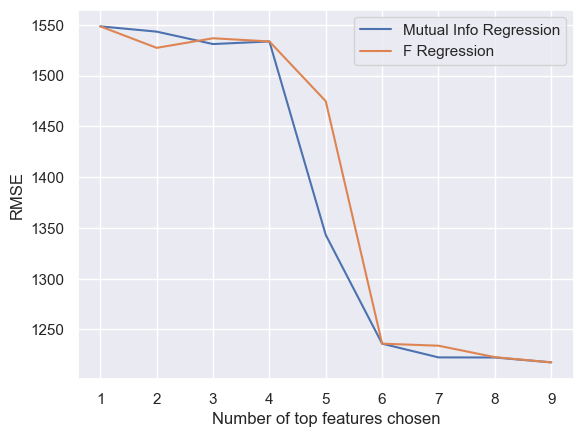

[1548.367656368973, 1543.192647408525, 1530.9555704440945, 1533.5352605063495, 1343.0638380902378, 1236.008566793327, 1222.4796495362646, 1222.3985697594103, 1217.5866682838844]
[1548.367656368973, 1527.2274607021377, 1536.6575041349004, 1533.5352605063495, 1474.7077873912299, 1236.008566793327, 1233.978024908132, 1222.7338614108162, 1217.5866682838844]


In [84]:
# explore the effect of feature selection on ols, manual 10-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
ols = LinearRegression(n_jobs=-1)
ave_ols_rmse_mir = []
ave_ols_rmse_fr = []
for i in range(1, 10):  # 9 features in total
    feature_select_mir = SelectKBest(score_func=mutual_info_regression, k=i)
    feature_select_fr = SelectKBest(score_func=f_regression, k=i)
    ols_rmse_mir = []
    ols_rmse_fr = []
    for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
        x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
        x_train = scaler.fit_transform(x_train, y_train)
        x_test = scaler.transform(x_test)
        x_train_mir = feature_select_mir.fit_transform(x_train, y_train)
        x_train_fr = feature_select_fr.fit_transform(x_train, y_train)
        # print(x_train_mir.shape)
        x_test_mir = feature_select_mir.transform(x_test)
        x_test_fr = feature_select_fr.transform(x_test)
        # print(x_test_mir.shape)

        ols.fit(x_train_mir, y_train)
        pred = ols.predict(x_test_mir)
        score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
        ols_rmse_mir.append(score)

        ols.fit(x_train_fr, y_train)
        pred = ols.predict(x_test_fr)
        score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
        ols_rmse_fr.append(score)
    ave_ols_rmse_mir.append(np.mean(ols_rmse_mir))
    ave_ols_rmse_fr.append(np.mean(ols_rmse_fr))
plt.plot(np.arange(1, 10), ave_ols_rmse_mir, label='Mutual Info Regression')
plt.plot(np.arange(1, 10), ave_ols_rmse_fr, label='F Regression')
plt.xlabel('Number of top features chosen')
plt.ylabel('RMSE')
plt.legend(loc="upper right")
plt.savefig('OLS_feature_selection.png', dpi=300)
plt.show()
print(ave_ols_rmse_mir)
print(ave_ols_rmse_fr)

In [85]:
#  two features for the diamond dataset that has the lowest MI w.r.t to the target
scaler = StandardScaler()
d = scaler.fit_transform(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])))  # features
target = dataset_original_mat[:, 7]  # price
mi_scores = mutual_info_regression(d, target, random_state=42)
print(mi_scores)
print(np.argsort(mi_scores)[:2])  # indices of the features with the lowest MI: 4=depth, 5=table

[1.65030231 0.05614403 0.1366197  0.2168821  0.03236708 0.03511887
 1.41381637 1.42066019 1.3617914 ]
[4 5]


In [86]:
# lasso: find the best penalty parameter, manual 10-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
penalty = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]
ave_lasso_rmse = []
ave_lasso_rmse_train = []
for k in penalty:
    lasso = Lasso(alpha=k, random_state=42)
    lasso_rmse = []
    lasso_rmse_train = []
    for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
        x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
        # standardize the data, exclude the label y
        x_train = scaler.fit_transform(x_train, y_train)
        x_test = scaler.transform(x_test)
        lasso.fit(x_train, y_train)
        pred = lasso.predict(x_test)
        score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
        lasso_rmse.append(score)
        pred_train = lasso.predict(x_train)
        score_train = np.sqrt(mean_squared_error(y_train, pred_train))  # RMSE of training
        lasso_rmse_train.append(score_train)
    # print(lasso_rmse)
    ave_lasso_rmse.append(np.mean(lasso_rmse))
    ave_lasso_rmse_train.append(np.mean(lasso_rmse_train))
print('average RMSE on the testing set:', ave_lasso_rmse)
min_ave_lasso_rmse = min(ave_lasso_rmse)
min_ave_lasso_rmse_index = ave_lasso_rmse.index(min_ave_lasso_rmse)
print(penalty[min_ave_lasso_rmse_index])
print('average RMSE on the training set:', ave_lasso_rmse_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 39.67it/s]

average RMSE on the testing set: [1217.586564593206, 1217.585625373597, 1217.5762533384193, 1217.485895352872, 1216.874725869764, 1220.6714449513086, 1260.533877209308, 1843.0033357179182, 3988.8320899359082]
1
average RMSE on the training set: [1216.4904659153085, 1216.4904659875153, 1216.4904732227492, 1216.4912176788496, 1216.5663448185107, 1220.6298124322152, 1260.7581178607084, 1843.345260245957, 3989.3897468500995]


In [87]:
# ridge: find the best penalty parameter, manual 10-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
penalty = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]
ave_ridge_rmse = []
ave_ridge_rmse_train = []
for k in penalty:
    ridge = Ridge(alpha=k, random_state=42)
    ridge_rmse = []
    ridge_rmse_train = []
    for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
        x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
        # standardize the data, exclude the label y
        x_train = scaler.fit_transform(x_train, y_train)
        x_test = scaler.transform(x_test)
        ridge.fit(x_train, y_train)
        pred = ridge.predict(x_test)
        # print(pred[:10])
        # print(y_test[:10])
        score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
        ridge_rmse.append(score)
        pred_train = ridge.predict(x_train)
        score_train = np.sqrt(mean_squared_error(y_train, pred_train))  # RMSE of training
        ridge_rmse_train.append(score_train)
    ave_ridge_rmse.append(np.mean(ridge_rmse))
    ave_ridge_rmse_train.append(np.mean(ridge_rmse_train))
print('average RMSE on the testing set:', ave_ridge_rmse)
min_ave_ridge_rmse = min(ave_ridge_rmse)
min_ave_ridge_rmse_index = ave_ridge_rmse.index(min_ave_ridge_rmse)
print(penalty[min_ave_ridge_rmse_index])
print('average RMSE on the training set:', ave_ridge_rmse_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 45.29it/s]

average RMSE on the testing set: [1217.5866669070824, 1217.5866545179424, 1217.5865306513792, 1217.585294467853, 1217.5731797609048, 1217.475708606998, 1218.1556192321868, 1259.9118375797723, 1476.660475846063]
10
average RMSE on the training set: [1216.4904659145668, 1216.4904659147137, 1216.4904659294002, 1216.490467397736, 1216.4906139185987, 1216.5049607667622, 1217.6933877997903, 1258.7172355030139, 1473.1971782483179]


In [88]:
# Gridsearch function test for lasso and ridge, automatic 10-folds cross-validation
# Note: The result is iddentical to the manual cross-validation (KFold), and it's faster!
pipeline = Pipeline([('standardize',StandardScaler()), ('model', Ridge(alpha=1e-4, random_state=42))])
param_dict = {
    'model': (Ridge(random_state=42), Lasso(random_state=42)),
    'model__alpha': (1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000)
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dict, scoring='neg_root_mean_squared_error', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42), verbose=4, n_jobs=-1, return_train_score=True)
print('start grid search!!!')
grid_search.fit(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])), dataset_original_mat[:, 7])
print('Best model:', grid_search.best_estimator_)
print('Best model\'s parameters for regularization:', grid_search.best_params_)
print('Best RMSE:', -grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_).to_csv(path_or_buf="grid_results_lasso_ridge.csv", index=False, encoding='utf-8')

start grid search!!!
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Best model: Pipeline(steps=[('standardize', StandardScaler()),
                ('model', Lasso(alpha=1, random_state=42))])
Best model's parameters for regularization: {'model': Lasso(alpha=1, random_state=42), 'model__alpha': 1}
Best RMSE: 1216.874725869764


In [89]:
# ridge: explore the effect of feature standardization
print(penalty[min_ave_ridge_rmse_index])
ridge = Ridge(alpha=penalty[min_ave_ridge_rmse_index], random_state=42)
ridge_rmse = []
for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
    x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
    # standardize the data, exclude the label y
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    # print(pred[:10])
    # print(y_test[:10])
    score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
    ridge_rmse.append(score)
print(ridge_rmse)
print(np.mean(ridge_rmse))

10


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 63.45it/s]

[1246.2342467940903, 1202.220118501533, 1155.3433859969678, 1239.7263139210224, 1224.8446064635145, 1282.6897125151838, 1216.0263960203483, 1238.8404887475856, 1161.4223472814958, 1209.956037202598]
1217.7303653444337


In [90]:
# Question4.4: p-values for different features
p_value = []
d = scaler.fit_transform(dataset_original_mat)
target = dataset_original_mat[:, 7]
# print(target)
for i in [1, 2, 3, 4, 5, 6, 8, 9, 10]:
    f = d[:, i]
    # print(f[:10])
    slope, intercept, r, p, std = scipy.stats.linregress(f, target)
    p_value.append(p)
print(p_value)

[0.0, 1.746019328102135e-35, 0.0, 1.5717207638067988e-257, 0.01340045296109003, 3.7699631514332735e-193, 0.0, 0.0, 0.0]


In [91]:
# Question 5: Polynomial Regression, manual 10-folds cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scaler = StandardScaler()
ridge = Ridge(alpha=10000, random_state=42)
ave_poly_rmse = []
ave_poly_rmse_train = []
poly_degrees = [2, 3, 4, 5, 6]
feature_select = SelectKBest(score_func=mutual_info_regression, k=8)  # try feature selection.there are too many features in this part
for degree in poly_degrees:
    poly = PolynomialFeatures(degree)
    single_poly_ridge_rmse = []
    single_poly_ridge_rmse_train = []
    for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
        x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
        x_train = feature_select.fit_transform(x_train, y_train)
        x_test = feature_select.transform(x_test)
        x_train = poly.fit_transform(x_train, y_train)
        x_test = poly.transform(x_test)
        x_train = scaler.fit_transform(x_train, y_train)
        x_test = scaler.transform(x_test)
        ridge.fit(x_train, y_train)
        pred = ridge.predict(x_test)
        score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
        single_poly_ridge_rmse.append(score)
        pred_train = ridge.predict(x_train)
        score_train = np.sqrt(mean_squared_error(y_train, pred_train))  # RMSE of training
        single_poly_ridge_rmse_train.append(score_train)
    ave_poly_rmse.append(np.mean(single_poly_ridge_rmse))
    ave_poly_rmse_train.append(np.mean(single_poly_ridge_rmse_train))
print('average RMSE on the testing set:', ave_poly_rmse)
min_ave_poly_rmse = min(ave_poly_rmse)
min_ave_poly_rmse_index = ave_poly_rmse.index(min_ave_poly_rmse)
print(poly_degrees[min_ave_poly_rmse_index])
print('average RMSE on the training set:', ave_poly_rmse_train)
# Note: feature selection works here. If no feature selection, ave RMSE will be about 880. (Compared to 873 now)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:12<00:00, 13.20s/it]

average RMSE on the testing set: [1063.5865443372047, 873.4041990985573, 1195.3048644870344, 3091.9344064496563, 8795.139830789507]
3
average RMSE on the training set: [1046.7463138861528, 822.6015872906722, 712.3899827791718, 666.8038490266176, 644.6148868259231]


In [92]:
# best degree=3
poly = PolynomialFeatures(3)
target = dataset_original_mat[:, 7]
d = poly.fit_transform(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])), target)
d = scaler.fit_transform(d)
mi_scores = mutual_info_regression(d, target, random_state=42)
print(mi_scores)
print(np.argsort(mi_scores))  # index of the features with the increasing MI
# Note: 5 features with the largest MI (index=13, 1, 12, 10, 11) are related to carat    

[1.11328127e-03 1.65204103e+00 5.54799848e-02 1.38895216e-01
 2.20425974e-01 3.20253320e-02 3.57147767e-02 1.41294822e+00
 1.42130449e+00 1.36155358e+00 1.65278155e+00 1.31920621e+00
 1.42170968e+00 1.54499876e+00 1.40378009e+00 1.51458371e+00
 1.55614108e+00 1.56975338e+00 1.51050809e+00 5.73426247e-02
 1.78276087e-01 2.44361968e-01 6.61305046e-02 8.58325804e-02
 9.10006049e-01 8.91424706e-01 9.06888018e-01 1.37997171e-01
 4.58157391e-01 1.05196371e-01 1.55532393e-01 8.35479459e-01
 8.42198651e-01 8.35511472e-01 2.15470548e-01 1.88840135e-01
 2.41130410e-01 1.02637318e+00 1.01204545e+00 1.01143630e+00
 3.25281337e-02 4.51970337e-02 1.31456178e+00 1.31795280e+00
 1.13093089e+00 3.38964612e-02 1.12345684e+00 1.11506431e+00
 1.16491485e+00 1.41340532e+00 1.39968205e+00 1.41876395e+00
 1.42114976e+00 1.42163351e+00 1.36121240e+00 1.65069954e+00
 1.52348209e+00 1.71565177e+00 2.00082220e+00 1.54602220e+00
 1.52300928e+00 1.62393460e+00 1.64700864e+00 1.58003922e+00
 1.34503256e+00 1.038389

In [93]:
import warnings
warnings.filterwarnings('ignore')  # to ignore the warning of the mlp below

In [94]:
# This cell is not used because the manual gridsearch is too slow (1 hour)! However, it shows the detail.
# DO NOT try to run this cell!
'''
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scaler = StandardScaler()
mlp_hidden_layer = [[30,], [40,], [50,], [40, 40], [50, 50]]  # 5 options in hidden layers
weight_decay = [1e-4, 1e-3, 1e-2, 1e-1]  # 4 options in weight decay
for h in mlp_hidden_layer:
    print('hidden_layer:', h)
    ave_mlp_rmse_weight_decay = []
    for i in weight_decay:
        mlp = MLPRegressor(hidden_layer_sizes=h, activation='relu', alpha=i, random_state=42, learning_rate_init=0.01)
        mlp_rmse = []
        for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices
            x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)
            x_train = scaler.fit_transform(x_train, y_train)
            x_test = scaler.transform(x_test)
            mlp.fit(x_train, y_train)
            pred = mlp.predict(x_test)
            score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE
            mlp_rmse.append(score)
        ave_mlp_rmse_weight_decay.append(np.mean(mlp_rmse))
    print(ave_mlp_rmse_weight_decay)
    min_ave_mlp_rmse_weight_decay = min(ave_mlp_rmse_weight_decay)
    min_ave_mlp_rmse_weight_decay_index = ave_mlp_rmse_weight_decay.index(min_ave_mlp_rmse_weight_decay)
    print('Min RMSE parameter for hidden layer=', h, 'is:', weight_decay[min_ave_mlp_rmse_weight_decay_index])
    print('Min RMSE=', min_ave_mlp_rmse_weight_decay)
'''

"\nkf = KFold(n_splits=10, shuffle=True, random_state=42)\nscaler = StandardScaler()\nmlp_hidden_layer = [[30,], [40,], [50,], [40, 40], [50, 50]]  # 5 options in hidden layers\nweight_decay = [1e-4, 1e-3, 1e-2, 1e-1]  # 4 options in weight decay\nfor h in mlp_hidden_layer:\n    print('hidden_layer:', h)\n    ave_mlp_rmse_weight_decay = []\n    for i in weight_decay:\n        mlp = MLPRegressor(hidden_layer_sizes=h, activation='relu', alpha=i, random_state=42, learning_rate_init=0.01)\n        mlp_rmse = []\n        for train_id, test_id in tqdm(kf.split(dataset_original_mat), total=10):  # train and test are indices\n            x_train, y_train, x_test, y_test = get_train_test(dataset_original_mat, train_id, test_id)\n            x_train = scaler.fit_transform(x_train, y_train)\n            x_test = scaler.transform(x_test)\n            mlp.fit(x_train, y_train)\n            pred = mlp.predict(x_test)\n            score = np.sqrt(mean_squared_error(y_test, pred))  # RMSE\n           

In [95]:
# Q6 MLP: It is much faster than the code above! and the results are identical.
# Note: it will take about 10 minutes to run the code in this cell.(my cpu has 6 cores so it takes 1/6 of the above code's time)
pipeline = Pipeline([('standardize',StandardScaler()),
                     ('model', MLPRegressor(hidden_layer_sizes=[30,], alpha=1e-4, random_state=42, learning_rate_init=0.01))])
param_dict = {
    'model__alpha': (1e-4, 1e-3, 1e-2, 1e-1),
    'model__hidden_layer_sizes': ([30,], [40,], [50,], [40, 40], [50, 50])
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dict, scoring='neg_root_mean_squared_error', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42), verbose=4, n_jobs=-1, return_train_score=True)
print('start grid search!!!')
grid_search.fit(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])), dataset_original_mat[:, 7])
print('Best model:', grid_search.best_estimator_)
print('Best model\'s parameters for regularization:', grid_search.best_params_)
print('Best RMSE:', -grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_).to_csv(path_or_buf="grid_results_mlp.csv", index=False, encoding='utf-8')

start grid search!!!
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best model: Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 MLPRegressor(alpha=0.1, hidden_layer_sizes=[40, 40],
                              learning_rate_init=0.01, random_state=42))])
Best model's parameters for regularization: {'model__alpha': 0.1, 'model__hidden_layer_sizes': [40, 40]}
Best RMSE: 584.2862117529328


In [96]:
# Q7 random forest
pipeline = Pipeline([('standardize',StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=100, max_depth=1, max_features=1, random_state=42, oob_score=True, n_jobs=-1))])
param_dict = {
    'model__n_estimators': (30, 50, 80),
    'model__max_depth': (4, 10, 20, 50),
    'model__max_features': (3, 5, 7, 9)
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_dict, scoring='neg_root_mean_squared_error', 
                           cv=KFold(n_splits=10, shuffle=True, random_state=42), verbose=4, n_jobs=-1, return_train_score=True)
print('start grid search!!!')
grid_search.fit(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])), dataset_original_mat[:, 7])
print('Best model:', grid_search.best_estimator_)
print('Best model\'s parameters for regularization:', grid_search.best_params_)
print('Best RMSE:', -grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_).to_csv(path_or_buf="grid_results_forest.csv", index=False, encoding='utf-8')

start grid search!!!
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best model: Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=5,
                                       n_estimators=80, n_jobs=-1,
                                       oob_score=True, random_state=42))])
Best model's parameters for regularization: {'model__max_depth': 20, 'model__max_features': 5, 'model__n_estimators': 80}
Best RMSE: 533.9011617874501


In [97]:
# best random forest model: 'model__max_depth': 20, 'model__max_features': 5, 'model__n_estimators': 80
scaler = StandardScaler()
random_forest = RandomForestRegressor(n_estimators=80, max_depth=20, max_features=5, random_state=42, oob_score=True, n_jobs=-1)
d = scaler.fit_transform(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])))
target = dataset_original_mat[:, 7]
random_forest.fit(d, target)
oob_score = random_forest.oob_score_
print('OOB score:', oob_score)
print('OOB error:', 1 - oob_score)

OOB score: 0.9820376477530293
OOB error: 0.017962352246970736


feature importance: [4.43408478e-01 1.42295504e-04 7.32536603e-03 3.58336030e-02
 1.36937739e-04 0.00000000e+00 1.13562097e-01 3.82375459e-01
 1.72157647e-02]
[0 7 6 3 8 2 1 4 5]
The most important feature: carat


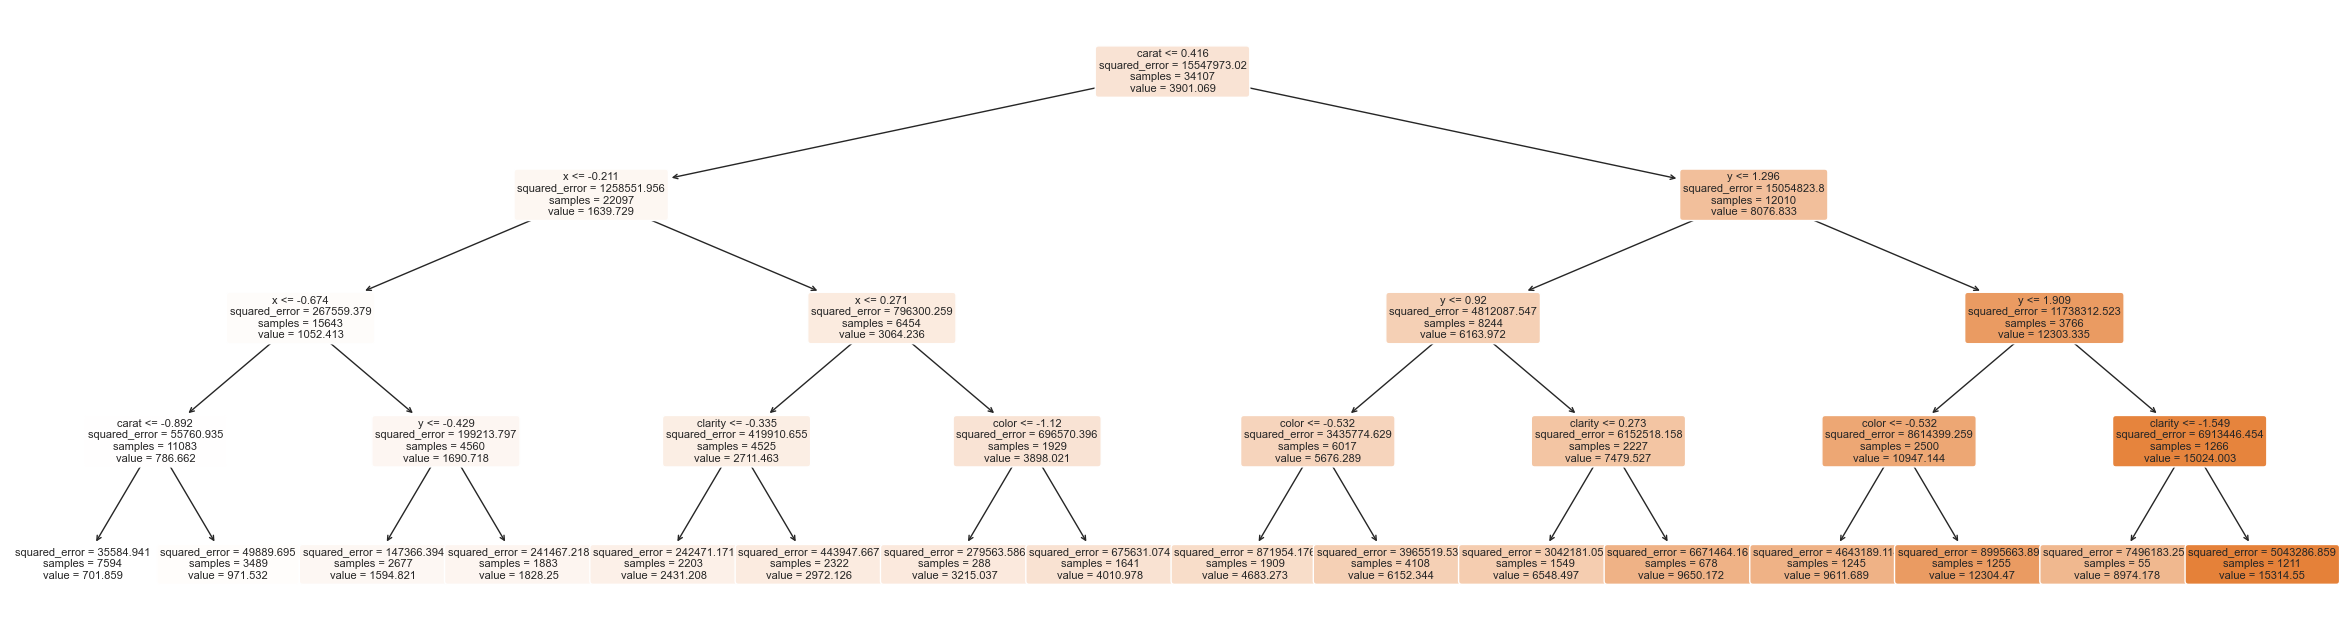

In [99]:
# plot a tree with maximum depth of 4
scaler = StandardScaler()
random_forest = RandomForestRegressor(n_estimators=80, max_depth=4, max_features=5, random_state=42, oob_score=True, n_jobs=-1)
d = scaler.fit_transform(np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11])))
target = dataset_original_mat[:, 7]
random_forest.fit(d, target)
print('feature importance:', random_forest.feature_importances_)
rank = np.argsort(-random_forest.feature_importances_)
print(rank)
feature_list = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
print('The most important feature:', feature_list[0])
tree_vis = random_forest.estimators_[0]
plt.figure(figsize=(30, 8))
tree.plot_tree(tree_vis, feature_names=feature_list, filled=True, rounded=True, fontsize=8)
plt.savefig('random_tree_vis.png', dpi=300, bbox_inches='tight', pad_inches=0)

## Question 8

In [100]:
import lightgbm as gbm
from skopt import BayesSearchCV

# X/y data (with categorical data replaced) = dataset_original_mat. Note: not standardized, includes index column
X = np.hstack((dataset_original_mat[:, 1:7], dataset_original_mat[:, 8:11]))
Y = dataset_original_mat[:,7]

# comparing to make sure the data is correctly divided
print(dataset_original.head)
print(X)
print(Y)

<bound method NDFrame.head of        Unnamed: 0  carat  cut  color  clarity  depth  table  price     x  \
0               1   0.23    5      6        2   61.5   55.0    330  3.95   
1               2   0.21    4      6        3   59.8   61.0    327  3.89   
2               3   0.23    2      6        5   56.9   65.0    328  4.05   
3               4   0.29    4      2        4   62.4   58.0    337  4.20   
4               5   0.31    2      1        2   63.3   58.0    338  4.34   
...           ...    ...  ...    ...      ...    ...    ...    ...   ...   
53935       53936   0.72    5      7        3   60.8   57.0   2758  5.75   
53936       53937   0.72    2      7        3   63.1   55.0   2759  5.69   
53937       53938   0.70    3      7        3   62.8   60.0   2760  5.66   
53938       53939   0.86    4      3        2   61.0   58.0   2757  6.15   
53939       53940   0.75    5      7        2   62.2   55.0   2761  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31

In [101]:
# standardizing each column
X_norm = scaler.fit_transform(X, Y)

In [102]:
# trying out a default LightGBM and evaluating training accuracy
model = gbm.LGBMRegressor(random_state = 42, n_jobs = -1)
model.fit(X_norm, Y)
model.score(X_norm, Y)

0.9857290552038946

In [103]:
# hyperparameters:
# number of top features used - [6] # After running multiple BayesSearch, we notice that the results for 6 features and 9 features are the same
# boosting_type - ['gbdt', 'dart', 'rf']
# num_leaves - 400 to 1200, interval = 200
# max_depth - 10 to 300, interval = 50
# learning_rate - [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
# n_estimators - 800 to 1200, interval = 100
# min_split_gain - [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.01]
# reg_alpha - [0.0001, 0.001, 0.01, 0.1, 1, 10]
# reg_lambda - [0.0001, 0.001, 0.01, 0.1, 1, 10]
# 'bagging_fraction': [0.5] # Needed to run rf type boosting
# 'bagging_freq': [1] # Needed to run rf type boosting

bayes_opt = BayesSearchCV(
    gbm.LGBMRegressor(random_state = 42, n_jobs = -1),
    {
    'boosting_type': ['gbdt', 'rf', 'dart'],
    'num_leaves': np.arange(400, 1200, 200),
    'max_depth': np.arange(10, 300, 50),
    'learning_rate': [1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1],
    'n_estimators': np.arange(800, 1200, 100),
    'min_split_gain': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2],
    'reg_alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'reg_lambda': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'bagging_fraction': [0.5],
    'bagging_freq': [1]
    },
    random_state = 42,
    n_iter = 50,
    cv = 5, # 10-fold cross-validation to get best results but it takes too long
    n_jobs = -1,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True,
    verbose = 2
)

In [104]:
# 6 features gives the same result and is faster, so we first apply the reduction
feature_select_fr = SelectKBest(score_func = f_regression, k = 6)
X_feature = feature_select_fr.fit_transform(X_norm, Y)

bayes_opt.fit(X_feature, Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
              random_state=42, return_train_score=True,
              scoring='neg_root_mean_squared_error',
              search_spaces={'bagging_fraction': [0.5], 'bagging_freq': [1],
                             'boosting_type': ['gbdt', 'rf', 'dart'],
                             'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1,
                                               0.5],
                             'max_depth': array([ 10,  60, 110, 160, 210, 260]),
                             'min_split_gain': [1e-05, 5e-05, 0.0001, 0.0005,
                                                0.001, 0.01],
                             'n_estimators': array([ 800,  900, 1000, 1100]),
                             'num_leaves': array([ 400,  600,  800, 1000]),
                             'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                             'reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
              verbose=2)

In [105]:
print(bayes_opt.best_params_)
print(bayes_opt.best_score_)

OrderedDict([('bagging_fraction', 0.5), ('bagging_freq', 1), ('boosting_type', 'dart'), ('learning_rate', 0.1), ('max_depth', 160), ('min_split_gain', 0.001), ('n_estimators', 1100), ('num_leaves', 600), ('reg_alpha', 0.01), ('reg_lambda', 10.0)])
-1137.1277069815837


In [106]:
def get_results_for_paramater(param_type):
    # we are traversing CV results and storing the results in a dictionary
    train_scores = {}
    test_scores = {}
    fit_time = {}

    # for each result, extend the mean scores for each param in the dict
    for index, param in enumerate(bayes_opt.cv_results_[param_type]):
        train_scores.setdefault(param, []).append(bayes_opt.cv_results_['mean_train_score'][index])
        test_scores.setdefault(param, []).append(bayes_opt.cv_results_['mean_test_score'][index])
        fit_time.setdefault(param, []).append(bayes_opt.cv_results_['mean_fit_time'][index])

    average_train_scores = { k : np.negative(np.mean(train_scores[k])) for k in train_scores }
    average_test_scores = { k : np.negative(np.mean(test_scores[k])) for k in test_scores }
    fit_time = { k : np.mean(fit_time[k]) for k in fit_time }

    return average_train_scores, average_test_scores, fit_time

def plot_results(param_type, average_train_scores, average_test_scores, x_axis_label, log = False):
    train_param_value_list = sorted(average_train_scores.items())
    x_train, y_train = zip(*train_param_value_list)

    test_param_value_list = sorted(average_test_scores.items())
    x_test, y_test = zip(*test_param_value_list)

    plt.plot(x_train, y_train, "bo-", label = "Train")
    plt.plot(x_test, y_test, "ro-", label = "Test")
    plt.title("Hyperparameter tuning results for " + param_type)

    if log:
        plt.xscale("log")

    plt.xlabel(x_axis_label)
    plt.ylabel("Mean 5-fold score")
    plt.legend()
    plt.show()

def plot_times(param_type, fit_time, x_axis_label, log = False, plot_trendline = True):
    fit_times = sorted(fit_time.items())
    x, y = zip(*fit_times)

    plt.plot(x, y, "bo-", label = "Time taken")
    plt.title("Time taken for fitting for " + param_type)

    if plot_trendline:
        time_trend = np.polyfit(x, y, 1)
        plt.plot(x, np.poly1d(time_trend)(x), "b--", label = "Time trend")

    if log:
        plt.xscale("log")

    plt.xlabel(x_axis_label)
    plt.ylabel("Time (s)")
    plt.legend()
    plt.show()

In [107]:
# save results to csv and import when needed without running hyperparameter search
opt_results = pd.DataFrame(bayes_opt.cv_results_)
opt_results.to_csv("cv_results.csv")

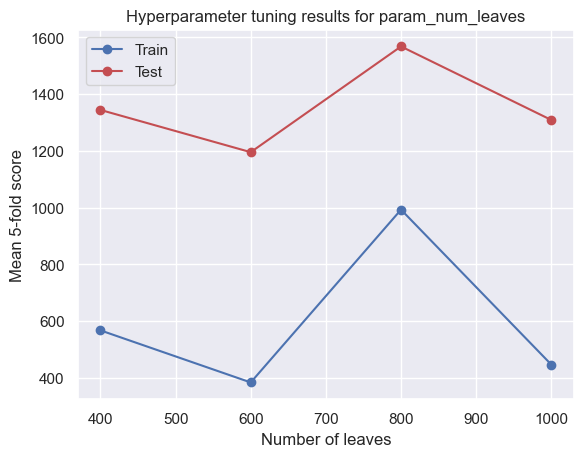

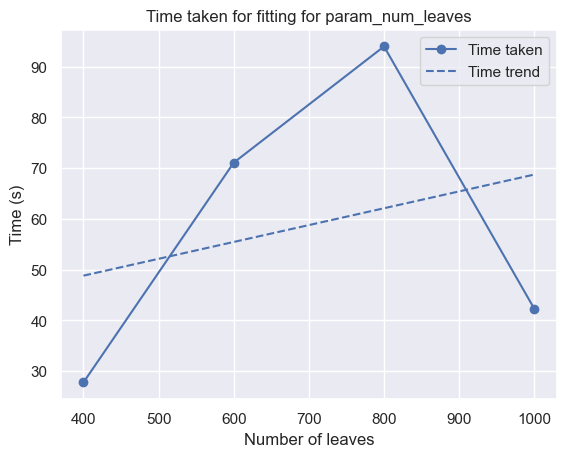

In [108]:
# num_leaves
param = 'param_num_leaves'
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Number of leaves")
plot_times(param, fit_time, "Number of leaves")

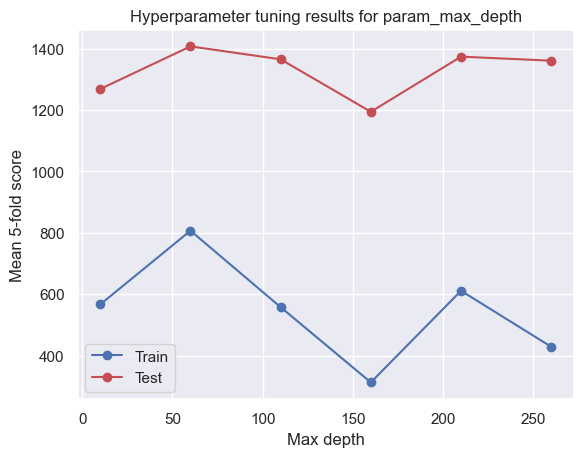

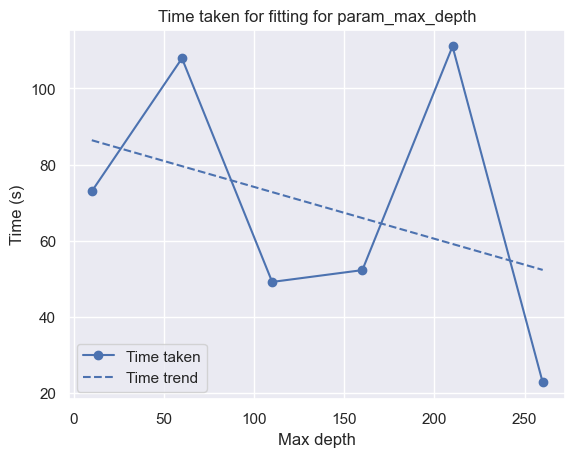

In [109]:
# max_depth
param = "param_max_depth"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Max depth")
plot_times(param, fit_time, "Max depth")

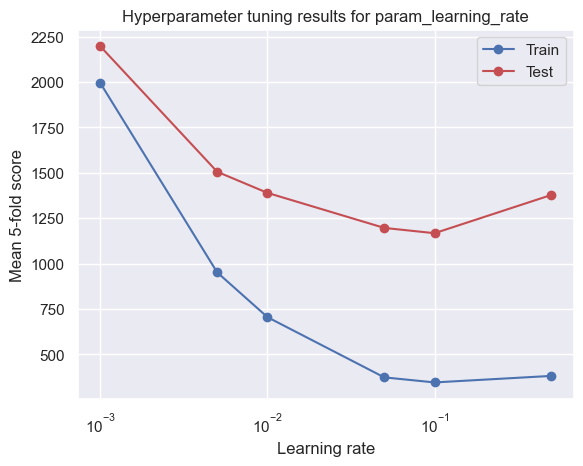

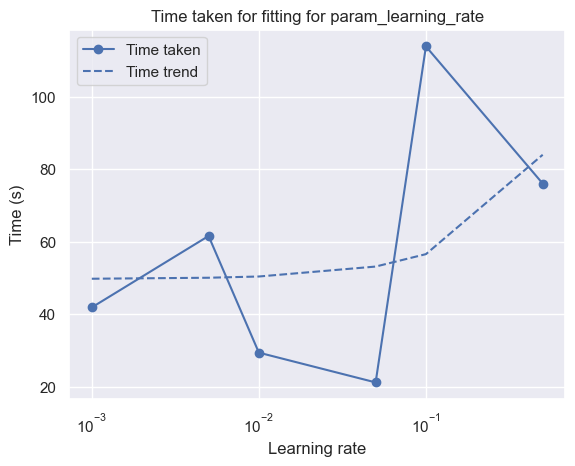

In [110]:
# learning_rate
param = "param_learning_rate"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Learning rate", True)
plot_times(param, fit_time, "Learning rate", True)

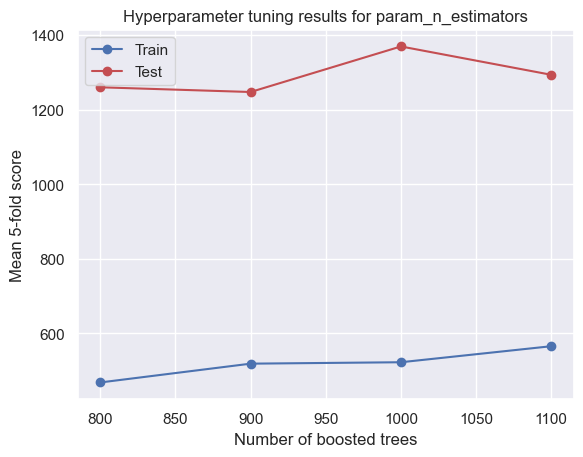

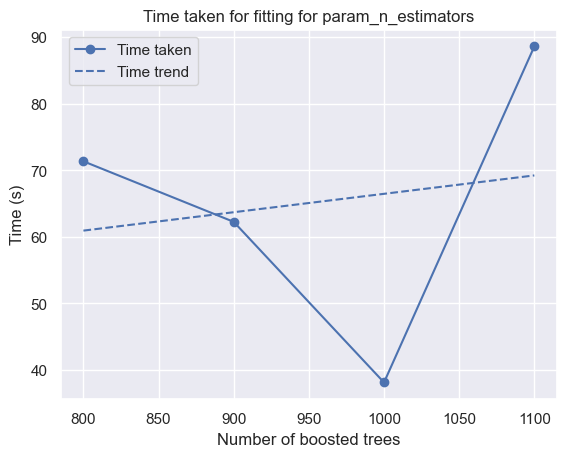

In [111]:
# n_estimators
param = "param_n_estimators"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Number of boosted trees")
plot_times(param, fit_time, "Number of boosted trees")

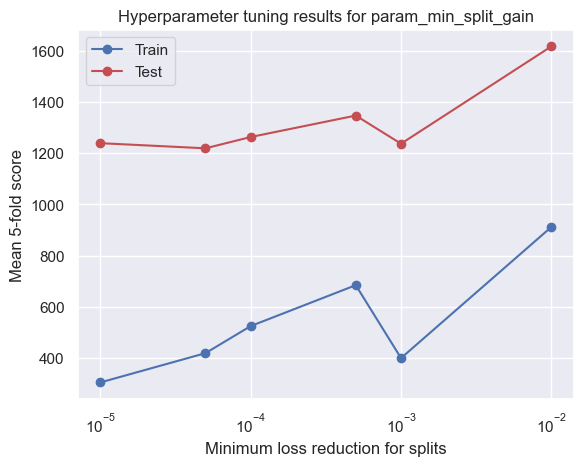

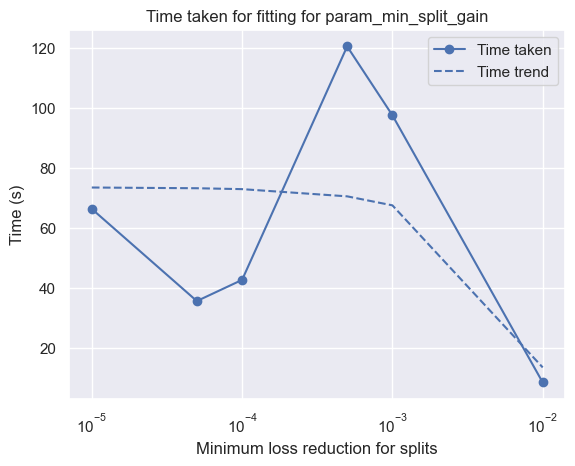

In [112]:
# min_split_gain
param = "param_min_split_gain"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Minimum loss reduction for splits", True)
plot_times(param, fit_time, "Minimum loss reduction for splits", True)

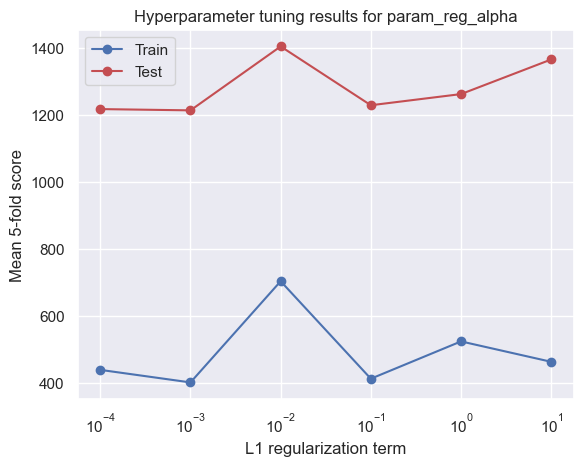

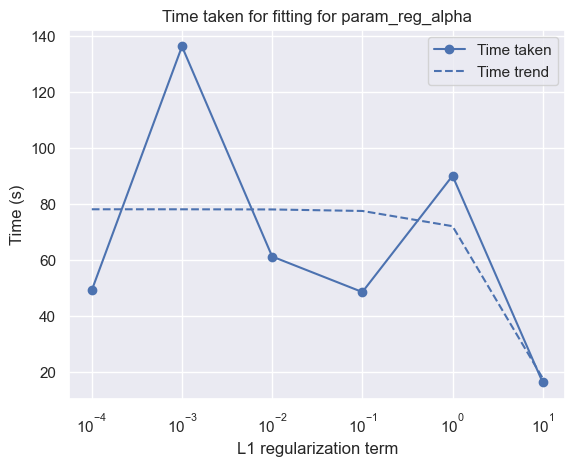

In [113]:
# reg_alpha
param = "param_reg_alpha"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "L1 regularization term", True)
plot_times(param, fit_time, "L1 regularization term", True)

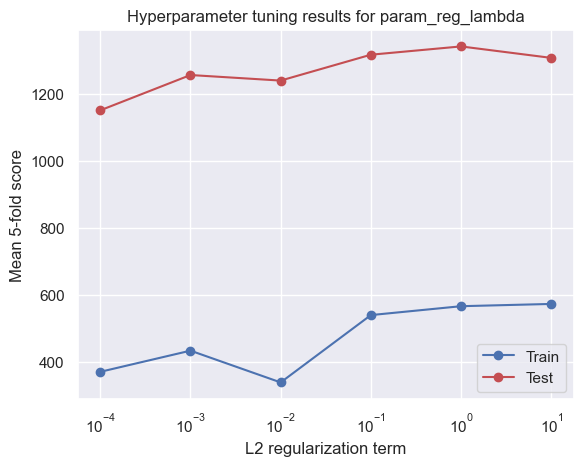

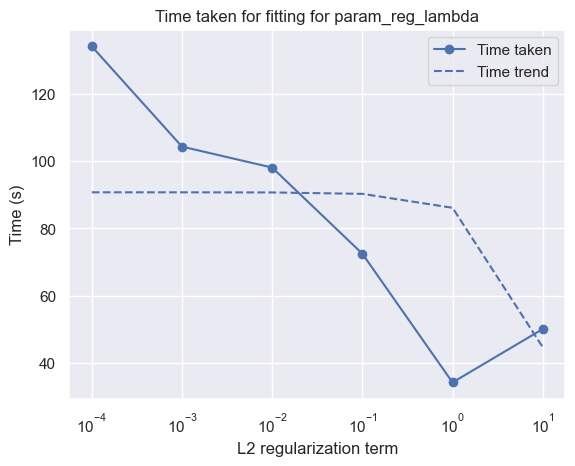

In [114]:
# reg_lambda
param = "param_reg_lambda"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "L2 regularization term", True)
plot_times(param, fit_time, "L2 regularization term", True)

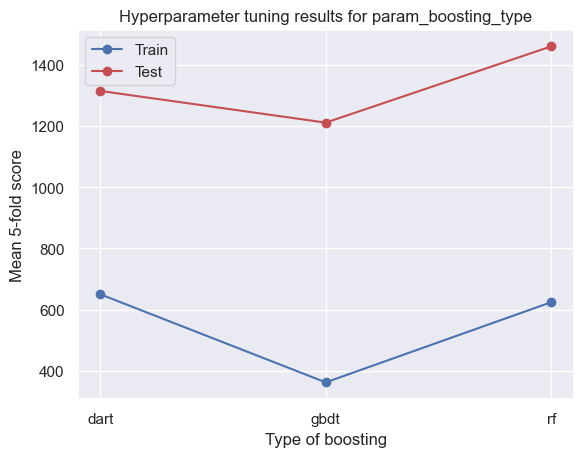

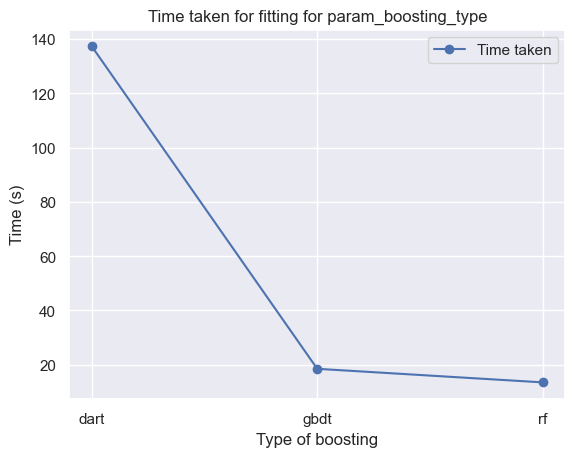

In [115]:
# boosting_type
param = "param_boosting_type"
average_train_scores, average_test_scores, fit_time = get_results_for_paramater(param)
plot_results(param, average_train_scores, average_test_scores, "Type of boosting")
plot_times(param, fit_time, "Type of boosting", plot_trendline = False)